<div align="center">
  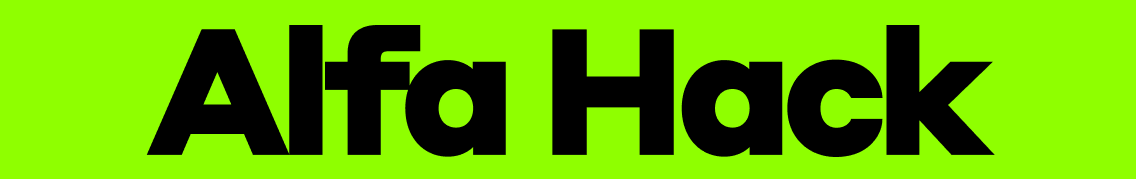
</div>

## Этап 1. Установка библиотек и импорт данных

In [ ]:
# Cкачиваем необходимые библиотеки для работы
!pip install pandas numpy scikit-learn

ERROR: Could not find a version that satisfies the requirement pytorch-macos (from versions: none)
ERROR: No matching distribution found for pytorch-macos

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import glob
import os

Подключаемся в Google Drive, чтобы работать с файлами из Google Colaboratory

In [6]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Указываем путь к корневым папкам с данными test и train

__Обратите внимание:__ если вы создали папку с названием отличным от _"Хакатон Альфа-банка. Кейс 1"_, то необходимо поменять путь к директории и ссылки ниже

In [ ]:
# Путь к папке с тренировочными данными
path_train = 'train' # Тут короче походу абсолютные пути нужны
# Путь к папке с тестовыми данными
path_test = 'test' # Тут короче походу абсолютные пути нужны

Получим список файлов в каждой из папок с данными

In [11]:
print(*[f'Список файлов в репозитории {x.split("/")[-1]}: {sorted(os.listdir(x), key=lambda x: len(x))}' for x in [path_train, path_test]], sep='\n')

Список файлов в репозитории train: ['train_4.csv', 'train_5.csv', 'train_7.csv', 'train_6.csv', 'train_2.csv', 'train_3.csv', 'train_1.csv', 'train_8.csv', 'train_9.csv', 'train_10.csv', 'Кейс-1. Кредитный скоринг юридических лиц. Baseline.ipynb']
Список файлов в репозитории test: ['test_1.csv', 'test_2.csv', 'test_3.csv', 'test_7.csv', 'test_6.csv', 'test_4.csv', 'test_5.csv', 'test_8.csv', 'test_9.csv', 'test_10.csv']


Объединим тренировочные и тестовые данные в единые датасеты train и test

In [12]:
# Получим список путей к файлам в папке train
filenames_train = glob.glob(path_train + "/*.csv")

# Создадим список для записи считанных файлов train
data_files_train = []

# Считаем все файлы train и добавим их в список
for filename in filenames_train:
    data_files_train.append(pd.read_csv(filename))

# Объединим тренировочные данные в единый датасет
data_train = pd.concat(data_files_train, ignore_index=True)

# Выведем информацию о размерности полученных тренировочных данных
display('Размерность полных тренировочных данных составляет: {} строка и {} столбец'.format(*data_train.shape))

# Выведем первые 5 строк тренировочных данных
display(data_train.head())

# Удостоверимся, что перед нами данные только из выборки train
data_train['smpl'].value_counts(dropna=False)

'Размерность полных тренировочных данных составляет: 38731 строка и 421 столбец'

,target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_409,feature_410,feature_411,feature_412,feature_413,feature_414,feature_415,feature_416,feature_417,feature_418
0,0,train,11619,-0.803605,1.373680,1.0,-0.147178,-1.135569,-0.829743,-0.688879,...,2.002449,1.139800,1.0,0.299604,0.739050,-0.870988,-1.643177,0.259418,3.224089,-0.905515
1,0,train,11620,-2.066605,-1.666932,0.0,0.087665,0.316779,0.918004,-0.143202,...,-2.153467,-0.122552,0.0,0.978408,-0.335446,0.698805,1.920243,0.397668,-0.979179,-1.496148
2,0,train,11621,-1.419976,0.570124,0.0,3.117520,-1.767073,1.087783,1.596354,...,0.541124,-2.008305,0.0,0.437926,-0.052971,1.839667,1.872591,0.065527,1.620158,0.235264
3,0,train,11622,0.241241,-1.165185,0.0,-0.946474,0.288386,0.908839,1.049859,...,-0.298835,0.239494,0.0,-0.797018,-0.289733,0.836043,0.675707,0.293216,0.566113,0.311053
4,0,train,11623,-0.062594,0.446797,0.0,-0.039862,0.305150,-0.087690,-0.157288,...,-0.910352,-0.607310,0.0,1.142165,-1.211827,-0.241350,-0.354882,-1.209285,0.545290,0.092345


smpl
train    38731
Name: count, dtype: int64

In [13]:
# Получим список путей к файлам в папке test
filenames_test = glob.glob(path_test + "/*.csv")

# Создадим список для записи считанных файлов test
data_files_test = []

# Считаем все файлы test и добавим их в список
for filename in filenames_test:
    data_files_test.append(pd.read_csv(filename))

# Объединим тестовые данные в единый датасет
data_test = pd.concat(data_files_test, ignore_index=True)

# Выведем информацию о размерности полученных тестовых данных
display('Размерность полных тренировочных данных составляет: {} строк и {} столбцов'.format(*data_test.shape))

# Выведем первые 5 строк тренировочных данных
display(data_test.head())

# Удостоверимся, что перед нами данные только из выборки test
data_test['smpl'].value_counts(dropna=False)

'Размерность полных тренировочных данных составляет: 19826 строк и 420 столбцов'

,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_409,feature_410,feature_411,feature_412,feature_413,feature_414,feature_415,feature_416,feature_417,feature_418
0,test,38731,0.262983,-1.153775,1.0,-0.648932,-0.847237,-0.462393,-1.215373,0.605520,...,-0.236218,-1.058259,0.0,0.835147,-0.176562,-1.455333,-0.766280,-1.365915,0.454763,0.809724
1,test,38732,-0.698407,-1.529096,1.0,0.033011,-1.166594,-0.889886,-0.900391,-1.201925,...,-1.157688,0.334938,0.0,-0.231860,-0.080340,-0.493846,-1.245681,-1.632521,0.246708,-0.226893
2,test,38733,-0.331403,-0.538437,1.0,-1.531462,-0.924031,-1.062342,-1.789274,-1.097902,...,-1.159555,0.351526,0.0,-1.375061,-0.156735,-0.437773,-1.851818,0.984694,0.630962,0.279446
3,test,38734,0.675162,-0.077064,1.0,-1.893065,0.610631,-1.404934,-2.650392,-1.752463,...,0.180918,0.269593,0.0,1.054666,-0.219652,-0.438285,-0.707442,-1.498935,0.962498,-0.390251
4,test,38735,-2.162385,-1.737901,1.0,-1.899384,-1.384151,0.106314,-0.814678,1.111808,...,0.696544,1.006378,0.0,1.107787,-0.282357,-0.235000,-1.794316,-0.504509,-0.385182,-1.130777


smpl
test    19826
Name: count, dtype: int64

## Этап 2. Работа с моделью

In [ ]:
# Выделим признаки для обучения и искомый признак в датасете train
# для обучения модели
X = data_train.drop(['target', 'smpl'], axis=1)
y = data_train['target']

# Разобьем тренировочные данные на валидационный и тренировочный датасет в соотношении 7 к 3
# Cтратифицируем выборки по искомому признаку, зафиксируем random_state для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

# Обучим модель на тренировочной части тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X_train, y_train)

# Получим предсказание с вероятностями для валидационной части тренировочного датасета
y_pred = gbdt_clf.predict_proba(X_test)

# Переведем предсказание в формат Series
y_pred = pd.Series(y_pred[:, 1])

# Высчитаем метрику roc-auc по валидационным данным
print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred)}')

RecursionError: maximum recursion depth exceeded

## Этап 3. Предсказание для тестовых данных



Получим предсказание на тестовых данных

In [15]:
# Обучим модель на полных тренировочных данных
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X, y)

# Для предсказания используем тестовый датасет с исключенным признаком smpl
y_test_pred = gbdt_clf.predict_proba(data_test.drop(['smpl'], axis=1))

# Переведем предсказание в формат Series
y_test_pred = pd.Series(y_test_pred[:, 1])

# Добавим данные предсказания к датасету
data_test['target'] = y_test_pred

# Сохраним итоговые данные об id и предсказаниях в формате csv
data_test[['id', 'target']].to_csv('baseline_submission_case1.csv', index=False)

Baseline создан компанией Changellenge >> - ведущей организацией по кейсам в России, для хакатона Alfa Hack.  

Запрещено распространение данного файла, файлов данных в форматах csv, а также текста кейса без письменного разрешения владельца авторских прав в лице компании Changellenge>>.